# **Program 1 - Linear SVM Classification** :
**Train & Implement a SVC Model for Detecting Iris Virginca Flowers.**

Load the iris dataset, scale the petal-width and petal-length features and then train a linear SVM model to detect Iris-Virginica flowers. Use the petal length and petal width features to train the model. Scale the features before training the model. Use the resulting model to do the detection on some sample data point.

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica has code 2

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X,y)

# predict for a sample iris flower with petal length 5.5 and petal width 1.7
svm_clf.predict([[5.5, 1.7]]) # detected as Iris Virginica
                              # [1 -- Virginica, 0 --  Not Virginica]

array([1.])

# **Program 2 - Nonlinear SVM Classification** :
**Train & Implement a SVC Model for Detecting Iris Virginca Flowers.**

Train and implement a SVM model to do binary classification on moons dataset. Since the dataset is linearly inseparable do a transformation and add polynomial features to the dataset.

In [ ]:
# Plotting Moons data to illustrate its linear inseparability
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise=0.4)



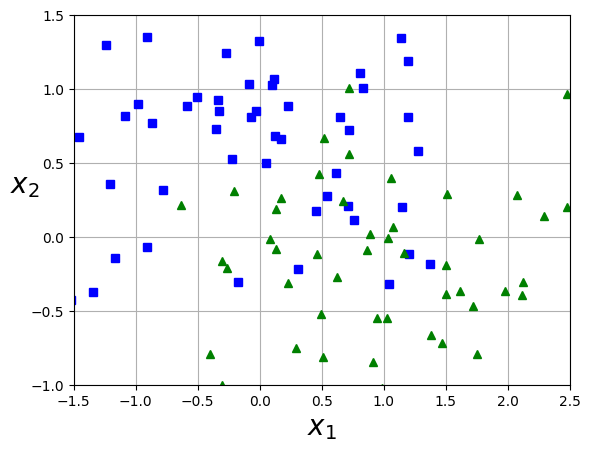

In [ ]:
def plot_dataset(X,y,axes):
    plt.plot(X[:,0][y==0], X[:,1][y==0], "bs") # bs stands for blue square
    plt.plot(X[:,0][y==1], X[:,1][y==1], "g^") # g^ stands for green triangle
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X,y,[-1.5,2.5,-1,1.5])


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss='hinge', random_state=42))
])

polynomial_svm_clf.fit(X,y)

C:\PratikHome\Programming\python_workspace\aiml\aimlenv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

**Visualizing the Non Linear SVM Classification Decision Boundary**

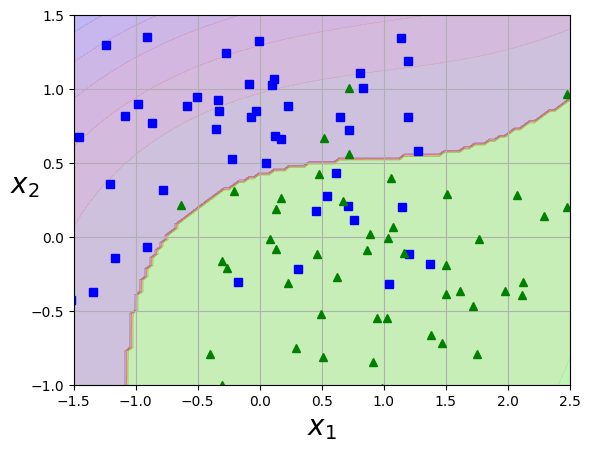

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# plot predictions and decision boundary
# of the previously trained SVM classifier for given x and y axes values
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])

# plot the linearly inseparable Moons Dataset as was done previously
plot_dataset(X,y,[-1.5,2.5,-1,1.5])



